<a href="https://colab.research.google.com/github/kandgesid/Data-Science-and-ML-projects/blob/master/Data_capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [ ]:
df = pd.read_csv('/content/lending_club_loan_two.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


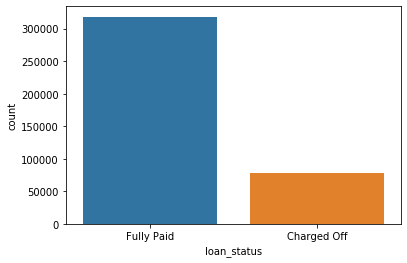

In [ ]:
# Since we are predicting loan status, plot a countplot of loan_status
sns.countplot(x="loan_status", data=df)

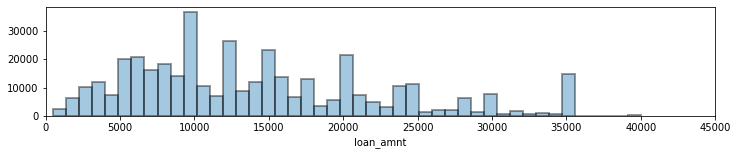

In [ ]:
# plot histogram of loan_amnt
plt.figure(figsize=(12,2))
plt.xlim((0,45000))
sns.distplot(df["loan_amnt"],kde=False,bins = 45,hist_kws=dict(edgecolor="k", linewidth=2))

In [ ]:
# let's get the corr matrix
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


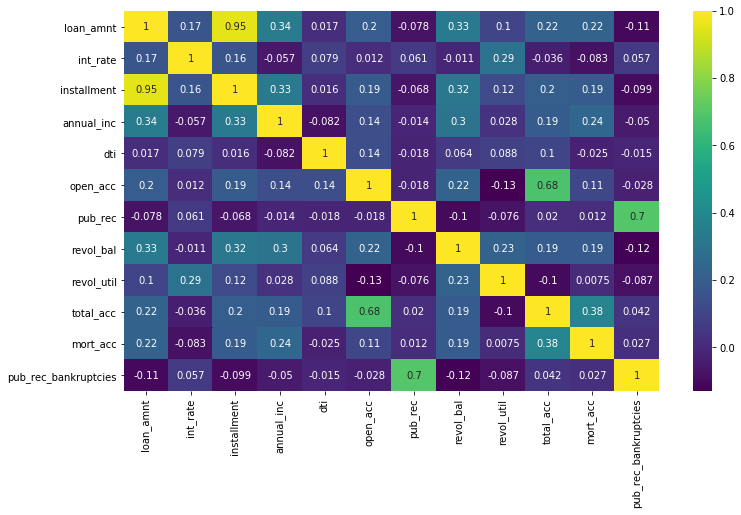

In [ ]:
# plot a heatmap
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True, cmap='viridis')

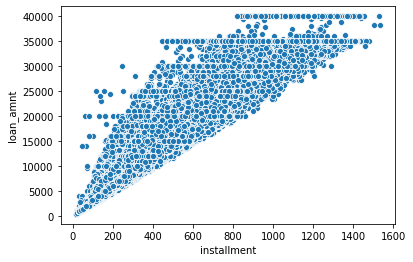

In [ ]:
# Here, we can notice almost perfect correlation with the "installment" feature
# plot scatter plot between installment and loan_amnt
sns.scatterplot(x=df["installment"], y =df["loan_amnt"])

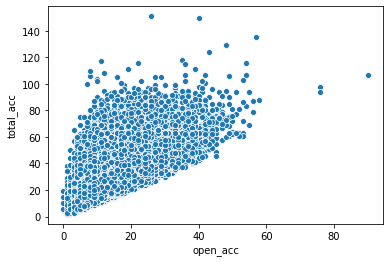

In [ ]:
# we find some corr between 'total_acc' (The total number of credit lines currently in the borrower's credit file) and 'open_acc' (The number of open credit lines in the borrower's credit file.)
#so plot the scatter plot to see the relation between them
sns.scatterplot(y=df["total_acc"], x = df["open_acc"])

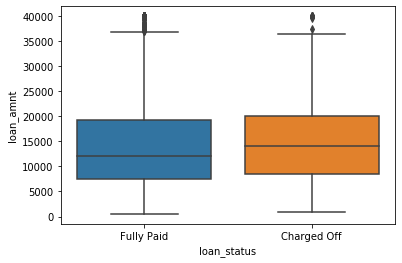

In [ ]:
# creating boxplot showing the relationship between the loan_status and the Loan Amount.
sns.boxplot(x = df["loan_status"], y = df["loan_amnt"])

In [ ]:
# summary statistics for the loan amount, grouped by the loan_status.
df.groupby("loan_status")['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
# Let's explore the Grade and SubGrade columns
print("Grade column\n")
print(df["grade"].unique())
print("\nsubgrade column\n")
print(df["sub_grade"].unique())

Grade column

['B' 'A' 'C' 'E' 'D' 'F' 'G']

subgrade column

['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


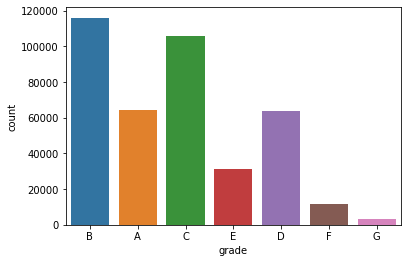

In [ ]:
sns.countplot(x=df['grade'])

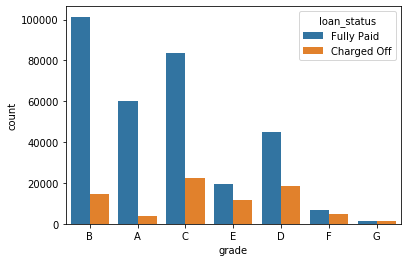

In [ ]:
sns.countplot(x=df['grade'],hue=df["loan_status"])

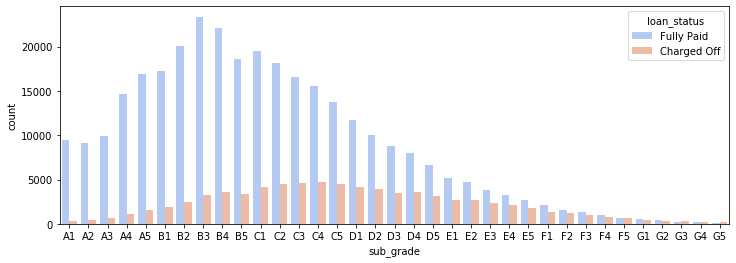

In [ ]:
# display countplot per sungrade
#CODE HERE
plt.figure(figsize=(12,4))
sub_gradeorder = sorted(df["sub_grade"].unique()) #some thing new to learn
sns.countplot(df["sub_grade"],order=sub_gradeorder,palette='coolwarm',hue='loan_status', data = df )

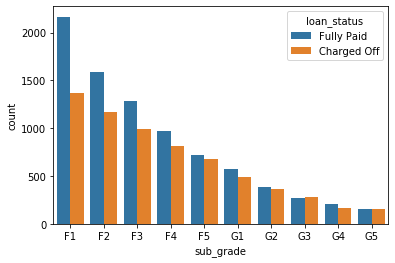

In [ ]:
#  It looks like F and G subgrades don't get paid back that often. Isloate those and recreate the countplot just for those subgrades.
f_and_g = df[(df["grade"] == 'G') | (df["grade"] == 'F')]
f_and_g
sub_gradeorder = sorted(f_and_g["sub_grade"].unique())
sns.countplot(f_and_g["sub_grade"],order=sub_gradeorder,hue='loan_status',data=df)

In [ ]:
# Creating a new column called 'loan_repaid' which will contain a 1 if the loan status was "Fully Paid" and a 0 if it was "Charged Off".
from sklearn.preprocessing import LabelEncoder

# Apply label encoder
label_encoder = LabelEncoder()
df["loan_repaid"] = label_encoder.fit_transform(df["loan_status"])
df[["loan_repaid", "loan_status"]]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


**Data** **PreProcessing**

In [ ]:
df.head(3)
print(len(df))

396030


In [ ]:
# Create a Series that displays the total count of missing values per column. 
print(df.isnull().sum())
print("\n Series to be in term of percentage of the total DataFrame") 
print(100*df.isnull().sum()/len(df))

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

 Series to be in term of percentage of the total DataFrame
loan_amnt               0.000000
term                    0.000000
int_rate             

In [ ]:
# Let's examine 'emp_title' and 'emp_length'
# emp_title :The job title supplied by the Borrower when applying for the loan
# emp_length :Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
print(df["emp_title"].nunique())


173105


In [ ]:
# Realistically there are too many unique job titles(173105) to try to convert this to a dummy variable feature. Let's remove that emp_title column.
df = df.drop("emp_title",axis = 1)
# so, 'revol_util' and the 'pub_rec_bankruptcies' have missing data points, but they account for less than 0.5% of the total data as seen from percetage table
df = df.dropna()

['1 year', '10+ years', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '< 1 year']


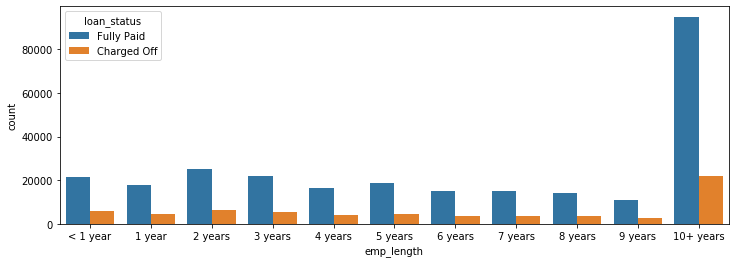

In [ ]:
print(sorted(df["emp_length"].dropna().unique()))
plt.figure(figsize=(12,4))
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']
sns.countplot(x = "emp_length", data = df, order = emp_length_order, hue = "loan_status")

we want to get relationship between employment length and being charged off, i.e percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 

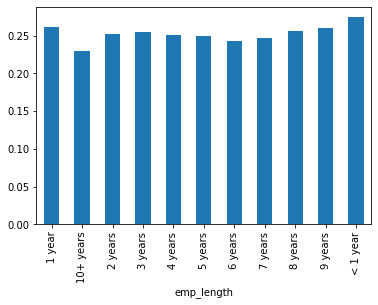

In [ ]:
df_co = df[df["loan_status"] == "Charged Off"].groupby("emp_length").count()["loan_status"]
df_fp = df[df["loan_status"] == "Fully Paid"].groupby("emp_length").count()["loan_status"]
emp_len = df_co/df_fp
emp_len.plot(kind = 'bar')

In [ ]:
# Charge off rates are extremely similar across all employment lengths. so, drop the emp_length column
df = df.drop("emp_length", axis = 1)

In [ ]:
print(df["title"].head(10))
print("\n")
print(df["purpose"].head(10))

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object


0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object


In [ ]:
# Here we can see that both columns are nothing but same. Hence, we drop one of the column
df = df.drop("title", axis = 1)

In [ ]:
# "mort_acc" : Number of mortgage accounts.
df["mort_acc"].value_counts()

0.0     132730
1.0      57544
2.0      47319
3.0      35797
4.0      26224
5.0      17112
6.0      10401
7.0       5660
8.0       2951
9.0       1558
10.0       817
11.0       448
12.0       246
13.0       136
14.0       104
15.0        60
16.0        36
17.0        20
18.0        17
19.0        14
20.0        12
24.0         9
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [ ]:
'''
Here we calculate corr of mort_acc with every other feature and from that we can find out to which
feature mort_acc is highly correlated.
so, we can fill mising value based on mean of the that column
'''
df.corr()["mort_acc"].drop("mort_acc").sort_values()

int_rate               -0.080808
dti                    -0.057879
revol_util              0.009101
pub_rec                 0.013554
pub_rec_bankruptcies    0.028581
loan_repaid             0.072013
open_acc                0.107809
installment             0.194675
revol_bal               0.198635
loan_amnt               0.224000
annual_inc              0.238951
total_acc               0.379183
Name: mort_acc, dtype: float64

In [ ]:
# total_acc feature correlates with the mort_acc 
print("Mean of mort_acc column per total_acc")
print(df.groupby('total_acc').mean())
print(df.groupby('total_acc').mean()["mort_acc"])

Mean of mort_acc column per total_acc
              loan_amnt   int_rate  ...  pub_rec_bankruptcies  loan_repaid
total_acc                           ...                                   
2.0         7068.750000  16.807500  ...              0.000000     0.750000
3.0         6283.435583  16.983497  ...              0.012270     0.834356
4.0         8491.914498  15.670582  ...              0.022305     0.791822
5.0         8492.549787  15.351031  ...              0.046942     0.794452
6.0         9093.593315  15.102971  ...              0.052925     0.779016
...                 ...        ...  ...                   ...          ...
124.0      23200.000000  17.860000  ...              0.000000     0.000000
129.0      25000.000000   7.890000  ...              0.000000     1.000000
135.0      24000.000000  15.410000  ...              0.000000     1.000000
150.0      35000.000000   8.670000  ...              0.000000     1.000000
151.0      35000.000000  13.990000  ...              0.000000 

In [ ]:
total_acc_mean = df.groupby('total_acc').mean()["mort_acc"]
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
df["mort_acc"] = df.apply(lambda x: fill_mort_acc(x["mort_acc"], x["total_acc"]), axis = 1)

In [ ]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

**Categorical Variables Encoding**

In [ ]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [ ]:
df["term"].value_counts()

 36 months    257727
 60 months     81517
Name: term, dtype: int64

In [ ]:
# 'term' has two unique values 36 and 60. we can encode into int column
df["term"] = df["term"].apply(lambda term: int(term[:3]))

In [ ]:
'''
we know grade is part of subgrade so drop grade column
and creat dummy variable for sun_grade column
'''
df = df.drop("grade", axis = 1)
subgrade_dummies = pd.get_dummies(df["sub_grade"], drop_first=True)
df = pd.concat([df.drop("sub_grade", axis = 1), subgrade_dummies], axis = 1)

In [ ]:
'''
similarly creat dummy variables for 'verification_status', 'application_type', 'initial_list_status', 'purpose'
'''
dummies = pd.get_dummies(df[['verification_status', 'application_type', 'initial_list_status', 'purpose']], drop_first=True)
df = pd.concat([df.drop(['verification_status', 'application_type', 'initial_list_status', 'purpose'], axis = 1), dummies], axis = 1)

In [ ]:
# review value_count for 'home_ownership'
df['home_ownership'].value_counts()

MORTGAGE    172634
RENT        135144
OWN          31404
OTHER           31
NONE            28
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
'''
Here, we can repalce NONE and ANY OTHER. so, our unique values will get reduce
Then after, Creat dummy variable for 'home_ownership'
'''
df["home_ownership"] = df['home_ownership'].replace(["NONE", "ANY"], "OTHER")
dummies = pd.get_dummies(df["home_ownership"], drop_first=True)
df = pd.concat([df.drop("home_ownership", axis = 1), dummies], axis = 1)

In [ ]:
'''
Address colums has long addresses which are not unique.
so, we can applay feature engg. on them and can extract zip_code from address which are some what unique 
and can added as one column of zip_code
Creat dummy variable for zip_code column
'''
df["zip_code"] = df["address"].apply(lambda x: x[-5:])
df = df.drop("address", axis = 1)
dummies = pd.get_dummies(df["zip_code"], drop_first = True)
df = pd.concat([df.drop("zip_code", axis = 1), dummies], axis = 1)

In [ ]:
df = df.drop("issue_d", axis = 1)

In [ ]:
# "earliest_cr_line": The month the borrower's earliest reported credit line was opened
# We will only take year from this column and creat new column of year
df["earliest_cr_year"] = df["earliest_cr_line"].apply(lambda x: int(x[-4:]))
df = df.drop("earliest_cr_line", axis = 1)

In [ ]:
# As we already created a loan_repaid column which is equivalent column of loan_status. We will drop loan_status column
df = df.drop("loan_status", axis = 1)

In [ ]:
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [ ]:
'''
Use a MinMaxScaler to normalize the feature data X_train and X_test.
we don't want data leakge from the test set so we only fit on the X_train data.
'''
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [ ]:
def creat_model():
  model = Sequential()
# input layer
  model.add(Dense(78,  activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())  
  model.add(Dropout(0.2))

# hidden layer
  model.add(Dense(39, activation='relu')) 
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.3))

# hidden layer
  model.add(Dense(39, activation='relu')) 
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.4))

# hidden layer
  model.add(Dense(19, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.5))

# hidden layer
  model.add(Dense(19, activation='relu'))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(Dropout(0.5))

# output layer
  model.add(Dense(units=1,activation='sigmoid'))
  return model

In [ ]:
model = creat_model()

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=25,
          batch_size=256,
          validation_data=(X_test, y_test), 
          )

Train on 237470 samples, validate on 101774 samples
Epoch 1/25
237470/237470 [==============================] - 14s 58us/sample - loss: 0.4864 - accuracy: 0.8022 - val_loss: 0.2929 - val_accuracy: 0.8885
Epoch 2/25
237470/237470 [==============================] - 11s 45us/sample - loss: 0.3128 - accuracy: 0.8814 - val_loss: 0.2679 - val_accuracy: 0.8886
Epoch 3/25
237470/237470 [==============================] - 10s 40us/sample - loss: 0.2909 - accuracy: 0.8837 - val_loss: 0.2631 - val_accuracy: 0.8885
Epoch 4/25
237470/237470 [==============================] - 10s 42us/sample - loss: 0.2815 - accuracy: 0.8849 - val_loss: 0.2603 - val_accuracy: 0.8886
Epoch 5/25
237470/237470 [==============================] - 10s 43us/sample - loss: 0.2782 - accuracy: 0.8849 - val_loss: 0.2591 - val_accuracy: 0.8885
Epoch 6/25
237470/237470 [==============================] - 10s 42us/sample - loss: 0.2747 - accuracy: 0.8854 - val_loss: 0.2585 - val_accuracy: 0.8885
Epoch 7/25
237470/237470 [==========

In [ ]:
from tensorflow.keras.models import load_model
#model.save('full_data_project_model.h5')
model.save('/content/drive/My Drive/full_data_project_model.hdf5')  

In [ ]:
model.load_model('/content/drive/My Drive/full_data_project_model.hdf5')

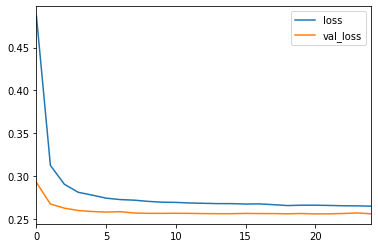

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = model.predict_classes(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.43      0.60     19803
           1       0.88      1.00      0.94     81971

    accuracy                           0.89    101774
   macro avg       0.94      0.71      0.77    101774
weighted avg       0.90      0.89      0.87    101774



In [ ]:
#tf.keras.models.load_model('full_data_project_model.h5')

**Check the pridiction on one of the user from given dataset**

In [ ]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
new_customer = df.drop("loan_repaid", axis = 1).iloc(random_ind)

In [ ]:
new_customer = scaler.transform(new_customer.values.reshape((1,78)))

In [ ]:
model.predict_classes(new_customer)

In [ ]:
df["loan_repaid"].iloc(random_ind)